# Introduction

In this lab, we will learn how to use the Affinity Propagation algorithm to perform clustering on a dataset. The Affinity Propagation algorithm is a clustering algorithm that does not require the number of clusters to be predefined, and it is able to automatically determine the number of clusters based on the input data.

# Import necessary libraries

We will start by importing the necessary libraries to perform the clustering and generate sample data.

In [1]:
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data

We will generate a sample dataset using the **make_blobs** function from the **sklearn.datasets** module. The **make_blobs** function generates a dataset of points in n-dimensional space, with each point belonging to one of k clusters. We will generate a dataset with 300 points in 2-dimensional space, with 3 clusters and a standard deviation of 0.5.

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

# Compute Affinity Propagation

We will use the **AffinityPropagation** class from the **sklearn.cluster** module to perform clustering on the dataset. We will set the **preference** parameter to -50, which controls the number of clusters that will be generated. A lower value of **preference** will result in more clusters being generated. We will then print out some metrics to evaluate the quality of the clustering.

In [3]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


# Plot the result

We will plot the resulting clusters using the **matplotlib** library. We will loop through each cluster and plot the points belonging to that cluster, along with the cluster center and the lines connecting the center to each point in the cluster.

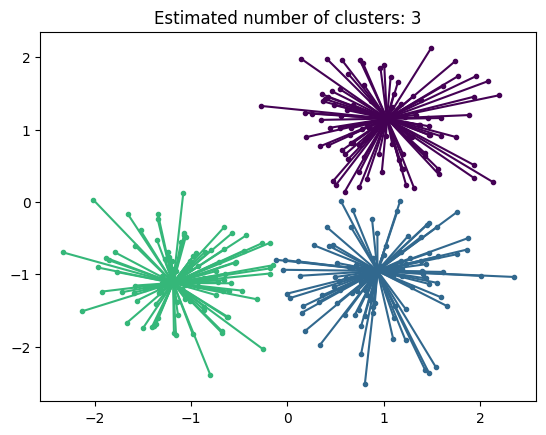

In [4]:
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Summary

In this lab, we learned how to use the Affinity Propagation algorithm to perform clustering on a dataset. We generated a sample dataset, performed clustering using the Affinity Propagation algorithm, and plotted the resulting clusters. We also evaluated the quality of the clustering using various metrics.